In [1]:
import pandas as pd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Glavna ideja

Naredili bomo nek realen primer analize **Titanic** dataseta.

Dataset vsebuje informacije o potnikih Titanika. Govori o starosti potnikov, spolu, številu družinskih članov, itd. In pa, podano ima informacijo o tem ali je potnik preživel ali ne.

Začeli bomo z osnovno analizo dataseta nato pa bo vsak izdelal Machine Learning model, ki bo napovedoval ali **potnik preživi ali ne**. Na koncu boste predstavili vaš rezultat.

# Import data

In [2]:
data = pd.read_csv('./data/titanic.csv')

# Quick info about data

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Naši podatki imajo 12 stolpcev:
* `PassengerId` - Unique ID za vsakega potnika. Ta stolpec bi lahko uporabili kot index.
* `Survived` - 0, če potnik ni preživel. 1, če je potnik preživel. To je naš LABEL stolpec. Naša vrednost katero bomo napovedovali
* `Pclass` - V katerem razredu je bil potnik. 1st = Upper Class; 2nd = Middle Class; 3rd = Lower Class
* `Name` - Ime potnika
* `Sex` - Spol potnika
* `Age` - Starost potnika
* `SibSp` - Pove koliko družine je potnik imel na ladji. Tukaj se štejejo *bratje, sestre, polbratje, polsestre, mož, žena*
* `Parch` - Število staršev/otrok, na ladji. 0 je v primeru, ko je otrok potoval z varuško
* `Ticket` - Številka karte
* `Fare` - Cena karte
* `Cabin` - Številka sobe
* `Embarked` - Kje se je potnik vkrcal. C = Cherbourg; Q = Queenstown; S = Southampton

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Dropping columns

In [5]:
to_drop = ["PassengerId", "Name", "Ticket", "Cabin"]
data.drop(columns=to_drop, inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Dropping vrstice, ki imajo prazno vrednost.

In [6]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


## Hipoteze

V našo analizo bomo vključili sledeče hipoteze:
1. ženske(Sex=female) so imele večjo možnost preživetja
2. otroc (Age <= ?) so imeli večjo možnost preživetja
3. upper class (Pclass=1) so imeli večjo možnost preživetja

In [7]:
data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.752896
1,male,0.205298


C:\Users\ygreg\OneDrive\Desktop\LTFE\ICTA\03_Python_Machine_Learning\.venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


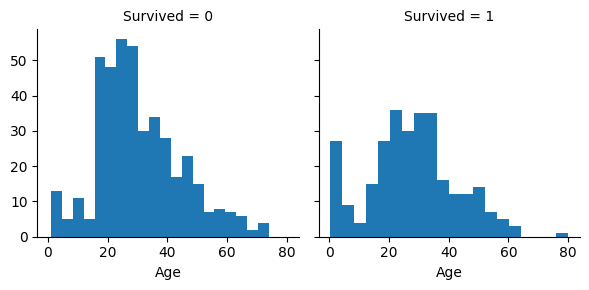

In [8]:
g = sns.FacetGrid(data, col='Survived')
g.map(plt.hist, 'Age', bins=20)

plt.show()

In [9]:
data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.652174
1,2,0.479769
2,3,0.239437


# Converting categorical features

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [11]:
data = pd.get_dummies(data)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,0,3,35.0,0,0,8.0500,False,True,False,False,True


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    712 non-null    int64  
 1   Pclass      712 non-null    int64  
 2   Age         712 non-null    float64
 3   SibSp       712 non-null    int64  
 4   Parch       712 non-null    int64  
 5   Fare        712 non-null    float64
 6   Sex_female  712 non-null    bool   
 7   Sex_male    712 non-null    bool   
 8   Embarked_C  712 non-null    bool   
 9   Embarked_Q  712 non-null    bool   
 10  Embarked_S  712 non-null    bool   
dtypes: bool(5), float64(2), int64(4)
memory usage: 42.4 KB


# Building a Model

In [13]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,0,3,35.0,0,0,8.0500,False,True,False,False,True


In [14]:
X = data.drop(columns="Survived")
y = data["Survived"]

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
# from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(X_train_scaled, y_train)
    
train_acc = clf.score(X_train_scaled, y_train)
test_acc = clf.score(X_test_scaled, y_test)

print("Training accuracy:", train_acc)
print("Test accuracy:", test_acc)

Training accuracy: 0.8445692883895131
Test accuracy: 0.797752808988764


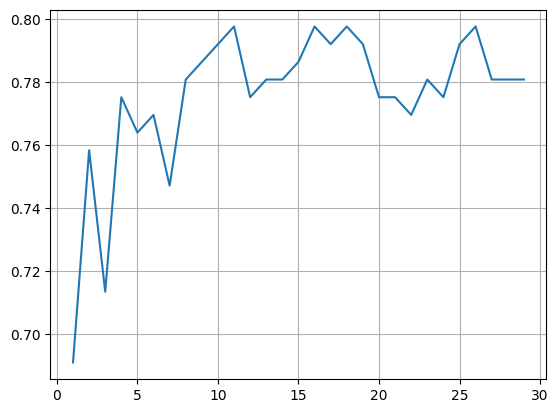

In [27]:
def find_best_k(k):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train_scaled, y_train)
        
    train_acc = clf.score(X_train_scaled, y_train)
    test_acc = clf.score(X_test_scaled, y_test)
    return test_acc

scores = []
ks = range(1, 30)
for k in ks:
    scores.append(find_best_k(k))

plt.plot(ks, scores)
plt.grid(True)
plt.show()

In [30]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_train_scaled, y_train)
    
train_acc = clf.score(X_train_scaled, y_train)
test_acc = clf.score(X_test_scaled, y_test)

print("Training accuracy:", train_acc)
print("Test accuracy:", test_acc)

Training accuracy: 0.8445692883895131
Test accuracy: 0.8033707865168539


In [33]:
def find_best_tree_params(max_depth, min_samples_split):
    clf = DecisionTreeClassifier(max_depth = max_depth, min_samples_split=min_samples_split)
    clf.fit(X_train_scaled, y_train)
        
    train_acc = clf.score(X_train_scaled, y_train)
    test_acc = clf.score(X_test_scaled, y_test)
    return test_acc

scores = []
max_depth = range(1, 20, 1)
min_samples_split = range(2, 30, 5)
for k in max_depth:
    for m in min_samples_split:
        scores.append(
            {
                "max_depht": k,
                "min_samples": m,
                "score": find_best_tree_params(k, m)
            })
scores.sort(key=lambda x: x["score"], reverse=True)
scores[:5]

[{'max_depht': 5, 'min_samples': 7, 'score': 0.8089887640449438},
 {'max_depht': 5, 'min_samples': 17, 'score': 0.8089887640449438},
 {'max_depht': 5, 'min_samples': 22, 'score': 0.8089887640449438},
 {'max_depht': 5, 'min_samples': 27, 'score': 0.8089887640449438},
 {'max_depht': 6, 'min_samples': 22, 'score': 0.8089887640449438}]